# GQ GMC-800 Pulse stretcher fix

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib widget

## Math

The average click rate $n$ for a Geiger counter with an event rate $m$, when pulses are stretched to a length $l$, is given by:

$$n = \frac{1}{m} e^\frac{l}{m}$$

The maximum is at $m = 1 / l$.

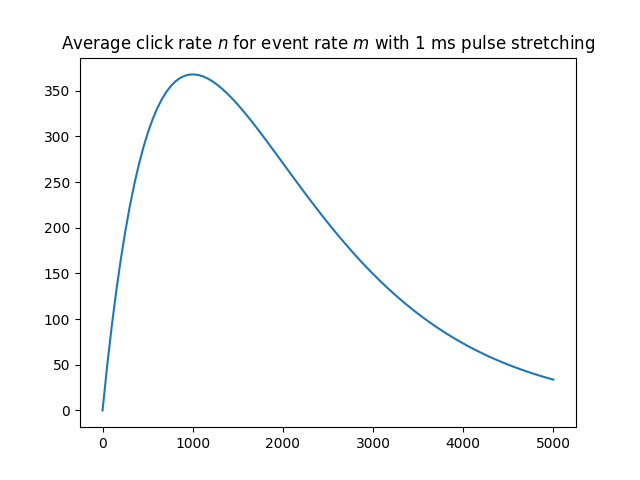

In [44]:
pulse_length = 0.001
m_rate = np.linspace(0, 5000, 100)
n_rate = m_rate * np.exp(-m_rate * pulse_length)
plt.figure()
plt.plot(m_rate, n_rate)
plt.title('Average click rate $n$ for event rate $m$ with 1 ms pulse stretching')
plt.show()

## Configuration

In [45]:
sample_freq = 48000
t_max = 10
n = t_max * sample_freq
t = np.linspace(0, t_max, n)

cps_start = 1
cps_end = 100000
cps = np.logspace(np.log10(cps_start), np.log10(cps_end), num=n)

## Poisson events

In [46]:
events = np.random.poisson(cps / sample_freq)
events = events.clip(max=1)

## Original audio events

In [47]:
pulse_duration = 0.001

pulse = np.ones(int(pulse_duration * sample_freq), dtype=int)
audio_events = np.convolve(events, pulse, mode='same')
audio_events = audio_events.clip(max=1)

scipy.io.wavfile.write("gq-gmc800-pulsestretcher-fix-original.wav", sample_freq, (8192 * audio_events).astype(np.int16))

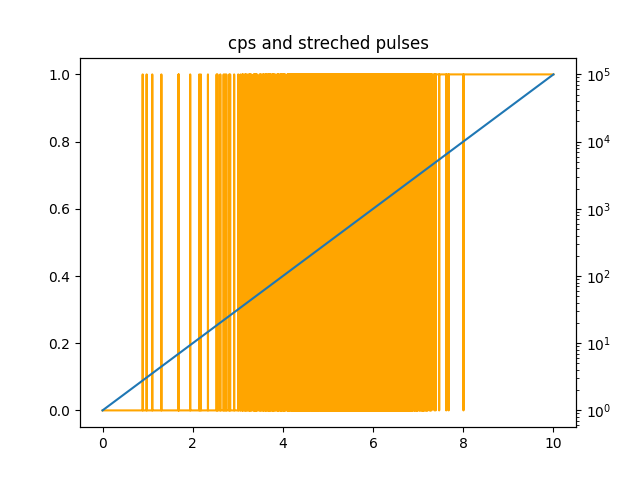

In [48]:
fig, ax1 = plt.subplots()
plt.plot(t, audio_events, color='orange')
ax2 = ax1.twinx()
plt.semilogy(t, cps)
plt.title('cps and streched pulses')
plt.show()

In [49]:
Audio(audio_events, rate=sample_freq)

## Corrected events

In [50]:
fix_freq = 1000
fix_n = int(sample_freq / fix_freq)

fix_cps_min = 1 / pulse_duration

corrected_audio_events = audio_events.copy()
x = []
for i in range(0, n, fix_n):
    if cps[i] > fix_cps_min:
        if np.random.uniform() > 0.5:
            corrected_audio_events[i:i + fix_n] = np.zeros(fix_n)

scipy.io.wavfile.write("gq-gmc800-pulsestretcher-fix-corrected.wav", sample_freq, (8192 * corrected_audio_events).astype(np.int16))

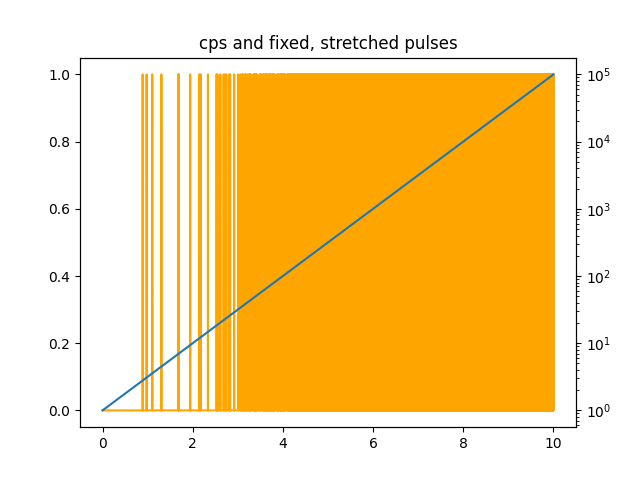

In [51]:
fig, ax1 = plt.subplots()
plt.plot(t, corrected_audio_events, color='orange')
ax2 = ax1.twinx()
plt.semilogy(t, cps)
plt.title('cps and fixed, stretched pulses')
plt.show()

In [52]:
Audio(corrected_audio_events, rate=sample_freq)